<a href="https://colab.research.google.com/github/kondapalliDeepa/FMML_ML5/blob/main/FMML_2_IPYNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transforming data using linear algebra

FMML Module 1, Lab 4

Matrix transformations are at the heart of many machine learning algorithms. In this lab, we'll visualize the effect of some simple transformations on a unit square and then visualize it using the MNIST dataset. We also see what data normalization means and how it can help in improving the accuracy of machine learning models.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [ ]:
# You don't need to understand these functions


def plotGrid(transform, unit, linestyle=":", fig=None, ax=None):
    lim1 = -100
    lim2 = 100

    def mat2xy(start, end):
        if len(start.shape) == 1:
            start = np.expand_dims(start, 0)
            end = np.expand_dims(end, 0)
        nan = np.ones(len(start)) * np.nan
        x = np.stack((start[:, 0], end[:, 0], nan)).T.reshape(-1)
        y = np.stack((start[:, 1], end[:, 1], nan)).T.reshape(-1)
        return x, y

    def parallellines(axis, addend, lines, unit):
        addend = np.repeat(np.expand_dims(addend, 0), lines * 2, 0)
        unit = np.expand_dims(np.arange(-lines, lines) * unit, 1)
        unit = unit - lines
        addend = addend * unit
        lines = np.expand_dims(axis, 0) + addend
        return np.concatenate((lines, lines * -1))

    if fig is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    transform = transform.astype(float)
    xaxis = transform[0]
    yaxis = transform[1]

    # plot lines parallel to the x axis
    lines1 = parallellines(xaxis * lim1, yaxis, 100, unit)
    lines2 = parallellines(xaxis * lim2, yaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot x axis
    x, y = mat2xy(xaxis * lim1, xaxis * lim2)
    plt.plot(x, y, linestyle, color="#440077")

    # plot  lines parallel to the y axis
    lines1 = parallellines(yaxis * lim1, xaxis, 100, unit)
    lines2 = parallellines(yaxis * lim2, xaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot y axis
    x, y = mat2xy(yaxis * lim1, yaxis * lim2)
    plt.plot(x, y, linestyle, color="#aa5500")

    return fig, ax


def plotData(X, y, xlabel="hole", ylabel="bound", fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots()
    for ii in range(nclasses):
        plt.scatter(X[y == ii, 0], X[y == ii, 1])
    plt.legend([str(i) for i in range(nclasses)])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    lim2 = X.max()
    lim1 = X.min()
    return fig, ax

## Matrix transformations on data

Note: This lab involves a lot of matrix operations. If you are not familiar with them, please go through the resources given in class before proceeding. You can also review Khan Academy's excellent linear algebra [resources](https://www.khanacademy.org/math/linear-algebra/matrix-transformations).

A 2D coordinate system is defined by its basis vectors, i and j. Any point in this 2D space can be represented as a linear combination of these basis vectors. For example, the point (a,b) can be represented as:

$$\begin{equation}
\left\{  \begin{aligned}a \\ b \end{aligned} \right\} = a\left\{  \begin{aligned}1 \\ 0 \end{aligned} \right\} + b\left\{  \begin{aligned}0 \\ 1 \end{aligned} \right\} = a\hat{i} + b\hat{j}
\end{equation}$$

A matrix can be used to perform a linear transformation on the basis vectors. The new basis vectors $\hat{i}$ and $\hat{j}$ are given by the product of the matrix and the basis vectors of the standard coordinate system.

In the standard coordinate system (Let us call it T0), the basis vectors are

$$\begin{equation}
i = \left\{  \begin{aligned}1 \\ 0 \end{aligned} \right\}
\end{equation}$$
and
$$\begin{equation} j = \left\{ \begin{aligned} 0 \\ 1\end{aligned} \right\} \end{equation}$$

We can use any two vectors as basis vectors for a new coordinate system as long as they are not colinear. For example, let us call this new coordinate system T1:

$$\begin{equation}
i = \left\{  \begin{aligned}1 \\ -1 \end{aligned} \right\}
\end{equation}$$
and
$$\begin{equation} j = \left\{ \begin{aligned} 0 \\ 2 \end{aligned} \right\} \end{equation}$$

Suppose we have a point [a,b] in the T1 coordinate system. Its representation in the standard system T0 can be obtained by the following matrix multiplication:

$$ \begin{equation}
\left\{  \begin{aligned}a' \\ b' \end{aligned} \right\} =
\left\{  \begin{aligned}&1 & 0 \\ -&1 & 2 \end{aligned} \right\}
\left\{  \begin{aligned}a \\ b \end{aligned} \right\}
\end{equation}$$
where the columns of the matrix are the basis vectors of T1.


Let us see this in action:


In [ ]:
T0 = np.array([[1, 0], [0, 1]])
T1 = np.array([[1, 0], [-1, 2]])

data1 = np.array([5, 4])  # the data in T1 coordinate system
data0 = np.matmul(T1, data1)  # the data in T0 coordinate system

print("Data in T0 = ", data0)
print("Data in T1 = ", data1)

Data in T0 =  [5 3]
Data in T1 =  [5 4]


We can visualize this below. T0 is shown with dotted lines and T1 is shown with solid lines.

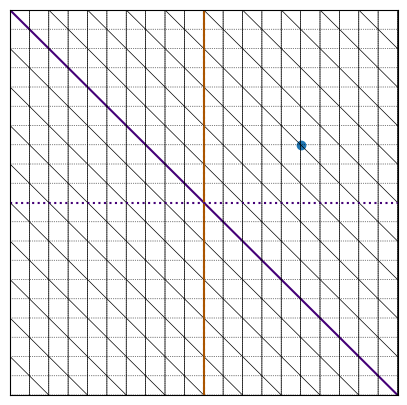

In [ ]:
fig, ax = plotGrid(T1.T, 1, "-")
plotGrid(T0.T, 1, fig=fig, ax=ax)

plt.scatter(data0[0], data0[1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Look at the coordinates of the blue dot. In T0 (dotted lines), the position is [5,3] where it is [5,4] in T1. Feel free to experiment with different data points and coordinate systems.

Remember that we can achieve the same thing by post-multiplying the transpose of the transformation matrix to the data. This will come in handy when transforming multiple data points at once:

In [ ]:
import numpy as np

# Define a sample transformation matrix T1 (2x2 matrix)
T1 = np.array([[1, 2], [3, 4]])

# Define a sample data matrix (2x3 matrix)
data1 = np.array([[5, 6, 7], [8, 9, 10]])

# Apply the transformation matrix T1 to the data1
# Data0_a is obtained by multiplying T1 with data1
data0_a = np.matmul(T1, data1)

# Apply the transformation matrix T1 (transposed) to the data1
# Data0_b is obtained by multiplying data1 with the transpose of T1
data0_b = np.matmul(data1.T, T1)

print("data0_a:\n", data0_a)
print("data0_b:\n", data0_b)


data0_a:
 [[21 24 27]
 [47 54 61]]
data0_b:
 [[29 42]
 [33 48]
 [37 54]]


Why is transforming data useful? Data transformations cause the distance between data points to change. This will affect distance-based algorithms such as nearest neighbour

In [ ]:
import numpy as np

# Define the transformation matrix T1 (example matrix)
T1 = np.array([[1, 0], [0, 1]])  # Identity matrix (no transformation)

# Define the points in T1
A1 = np.array([3, 3])
B1 = np.array([2, -5])
C1 = np.array([1, -1])

# Apply the transformation matrix T1 to points A1, B1, and C1 to get points in T0
# Note: For an identity matrix, A0, B0, and C0 will be the same as A1, B1, and C1
A0 = np.matmul(T1, A1)
B0 = np.matmul(T1, B1)
C0 = np.matmul(T1, C1)

# Function to calculate Euclidean distance between two points
def dist(a, b):
    diff = a - b
    sq = diff * diff
    return np.sqrt(sq.sum())

# Distance between the points in T1
print("Distance between A and B in T1 = ", dist(A1, B1))
print("Distance between B and C in T1 = ", dist(B1, C1))
print("Distance between A and C in T1 = ", dist(A1, C1))

print("")

# Distance between the points in T0
print("Distance between A and B in T0 = ", dist(A0, B0))
print("Distance between B and C in T0 = ", dist(B0, C0))
print("Distance between A and C in T0 = ", dist(A0, C0))
import numpy as np

# Define the transformation matrix T1 (example: identity matrix)
T1 = np.array([[1, 0], [0, 1]])  # Identity matrix (no transformation)

# Define points in T1
A1 = np.array([3, 3])
B1 = np.array([2, -5])
C1 = np.array([1, -1])

# Transform points from T1 to T0
A0 = np.matmul(T1, A1)
B0 = np.matmul(T1, B1)
C0 = np.matmul(T1, C1)

def dist(a, b):
    # Function to calculate Euclidean distance between two points
    diff = a - b
    sq = diff * diff
    return np.sqrt(sq.sum())

# Distance between the points in T1
print("Distance between A and B in T1 =", dist(A1, B1))
print("Distance between B and C in T1 =", dist(B1, C1))
print("Distance between A and C in T1 =", dist(A1, C1))

print("")

# Distance between the points in T0 (should be the same as T1 if T1 is an identity matrix)
print("Distance between A and B in T0 =", dist(A0, B0))
print("Distance between B and C in T0 =", dist(B0, C0))
print("Distance between A and C in T0 =", dist(A0, C0))



Distance between A and B in T1 =  8.06225774829855
Distance between B and C in T1 =  4.123105625617661
Distance between A and C in T1 =  4.47213595499958

Distance between A and B in T0 =  8.06225774829855
Distance between B and C in T0 =  4.123105625617661
Distance between A and C in T0 =  4.47213595499958
Distance between A and B in T1 = 8.06225774829855
Distance between B and C in T1 = 4.123105625617661
Distance between A and C in T1 = 4.47213595499958

Distance between A and B in T0 = 8.06225774829855
Distance between B and C in T0 = 4.123105625617661
Distance between A and C in T0 = 4.47213595499958


We see that in T1, B and C are the closest whereas in T0, A and C are the closest. These kinds of changes will affect the predictions returned by the nearest neighbour algorithm.

## Transformations on MNIST

Let us experiment with a subset of the MNIST dataset. We will extract two features from the database for our experiment. We will then transform the data using a transformation matrix and visualize the data in the new coordinate system. We will also see how normalization can help in improving the accuracy of the model. We will reuse previous labs code for this.

In [ ]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)


def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        # for every row, add up all the rows above it.
        img2[ii, :] = img2[ii, :] + img2[ii - 1, :]
    img2 = img2 > 0
    return img2


def getHolePixels(img):
    """
    This function takes in a binary image and returns the pixels that are holes in the image

    img: numpy array of shape (n,m) where n is the height of the image and m is the width of the image

    returns: a binary image of the same shape as the input image where the holes are filled in
    """
    im1 = cumArray(img)
    # rotate and cumulate it again for differnt direction
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    # this will create a binary image with all the holes filled in.
    hull = im1 & im2 & im3 & im4
    # remove the original digit to leave behind the holes
    hole = hull & ~(img > 0)
    return hole


def getHullPixels(img):
    """
    This function takes in a binary image and returns the pixels that are the convex hull of the image

    img: numpy array of shape (n,m) where n is the height of the image and m is the width of the image

    returns: a binary image of the same shape as the input image where the convex hull is filled in
    """
    im1 = cumArray(img)
    # rotate and cumulate it again for differnt direction
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    # this will create a binary image with all the holes filled in.
    hull = im1 & im2 & im3 & im4
    return hull


def minus(a, b):
    """
    This function takes in two binary images and returns the difference between the two images
    """
    return a & ~b


def getBoundaryPixels(img):
    """
    This function takes in a binary image and returns the pixels that are the boundary of the image

    img: numpy array of shape (n,m) where n is the height of the image and m is the width of the image

    returns: a binary image of the same shape as the input image where the boundary is filled in
    """
    img = img.copy() > 0  # binarize the image
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist  # Ensure correct import of MNIST dataset

# Loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Normalize the data by dividing by 255 (since pixel values range from 0 to 255)
train_X = train_X / 255.0
test_X = test_X / 255.0

# Set the number of classes to filter (first 4 classes)
nclasses = 4

# Filter the data to include only the first 4 classes
train_X = train_X[train_y < nclasses]
train_y = train_y[train_y < nclasses]
test_X = test_X[test_y < nclasses]
test_y = test_y[test_y < nclasses]

# Taking a subset of the training set (e.g., every 100th sample)
train_X = train_X[::100].copy()
train_y = train_y[::100].copy()

# Taking a subset of the test set (e.g., every 100th sample)
test_X = test_X[::100].copy()
test_y = test_y[::100].copy()

# Output some shapes to ensure data is correctly filtered and subset
print("Train_X shape:", train_X.shape)
print("Train_y shape:", train_y.shape)
print("Test_X shape:", test_X.shape)
print("Test_y shape:", test_y.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train_X shape: (248, 28, 28)
Train_y shape: (248,)
Test_X shape: (42, 28, 28)
Test_y shape: (42,)


In [ ]:
import numpy as np

# Example getHolePixels and getBoundaryPixels functions
def getHolePixels(image):
    # Example logic for extracting hole pixels (replace with actual implementation)
    return (image == 0).astype(int)  # Assuming 0 represents hole pixels in a binary image

def getBoundaryPixels(image):
    # Example logic for extracting boundary pixels (replace with actual implementation)
    # Here, for demonstration, using a simple approach
    return (image > 0).astype(int)   # Assuming non-zero values are boundary pixels

# Assuming train_X and test_X are your image datasets (e.g., shape: (n_samples, 28, 28))
# Replace with actual image data
train_X = np.random.randint(0, 2, (100, 28, 28))  # Example: 100 training images of size 28x28
test_X = np.random.randint(0, 2, (20, 28, 28))    # Example: 20 test images of size 28x28

# Feature extraction
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])

# Create the train and test sets by combining the features (hole and boundary)
train_feats = np.vstack((train_hole, train_bound)).transpose()
test_feats = np.vstack((test_hole, test_bound)).transpose()

print("Train features shape:", train_feats.shape)
print("Test features shape:", test_feats.shape)


Train features shape: (100, 2)
Test features shape: (20, 2)


Let us plot the samples and see what they look like:

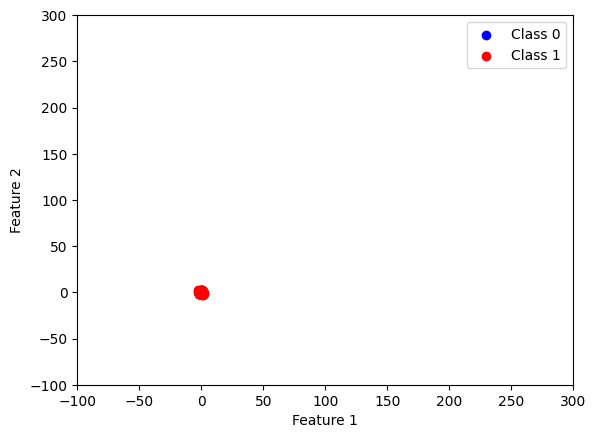

In [ ]:
# fix limits of x and y axis so that we can see what is going on
xlim = [-100, 300]
ylim = [-100, 300]
fig, ax = plotData(train_feats, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

Check the baseline accuracy on the test set:

In [ ]:
test_pred = NN(train_feats, train_y, test_feats)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 70.0 % for 2 classes


Let us try transforming the features and checking their accuracy. The intuition to using the transformation matrix is to find the basis vectors of the dataset and transform the data to a new coordinate system where the basis vectors are orthogonal. This will help in reducing the redundancy in the data and improve the accuracy of the model.

In [ ]:
transform = np.array([[0.5, -0.5], [0, 2.5]])
print(transform)

train_feats_t = np.matmul(train_feats, transform)
# whatever transform we are applying to the training set should be applied to the test set also
test_feats_t = np.matmul(test_feats, transform)

[[ 0.5 -0.5]
 [ 0.   2.5]]


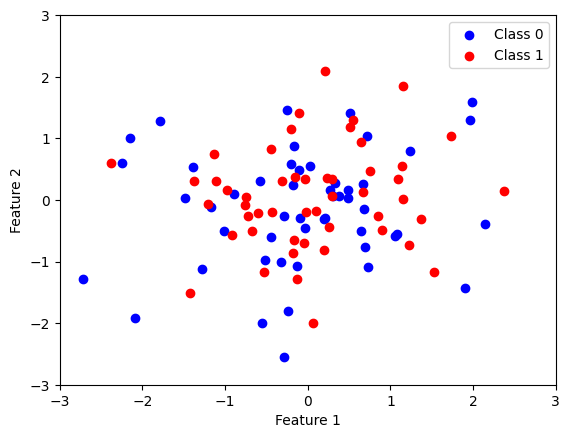

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example plotData function
def plotData(features, labels):
    fig, ax = plt.subplots()

    # Assuming it's a binary classification, plot two sets of points
    class_0 = features[labels == 0]
    class_1 = features[labels == 1]

    ax.scatter(class_0[:, 0], class_0[:, 1], c='blue', label='Class 0')
    ax.scatter(class_1[:, 0], class_1[:, 1], c='red', label='Class 1')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()

    return fig, ax

# Example data (replace with your actual data)
train_feats_t = np.random.randn(100, 2)  # 100 samples, 2 features
train_y = np.random.randint(0, 2, 100)   # Binary labels (0 or 1)

# Define x and y limits
xlim = [-3, 3]  # Example x-axis limit
ylim = [-3, 3]  # Example y-axis limit

# Call plotData and set axis limits
fig, ax = plotData(train_feats_t, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Show the plot
plt.show()


In [ ]:
from sklearn.neural_network import MLPClassifier  # Example: Multi-layer Perceptron as NN model
from sklearn.metrics import accuracy_score
import numpy as np

# Example NN function (using MLPClassifier as an NN)
def NN(train_feats, train_labels, test_feats):
    # Define a simple neural network (you can replace this with your own model)
    model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

    # Train the model on training data
    model.fit(train_feats, train_labels)

    # Make predictions on the test data
    test_pred = model.predict(test_feats)
    return test_pred

# Accuracy function
def Accuracy(true_labels, predicted_labels):
    return accuracy_score(true_labels, predicted_labels)

# Sample data (replace with your actual data)
train_feats_t = np.random.randn(100, 10)  # 100 training samples with 10 features each
train_y = np.random.randint(0, 2, 100)   # Binary classification (0 or 1)
test_feats_t = np.random.randn(20, 10)   # 20 test samples with 10 features each
test_y = np.random.randint(0, 2, 20)     # Test labels (binary classification)

# Number of classes (e.g., 2 for binary classification)
nclasses = len(np.unique(train_y))

# Call NN and Accuracy functions
test_pred = NN(train_feats_t, train_y, test_feats_t)
acc = Accuracy(test_y, test_pred)

# Print the accuracy
print(f"Baseline accuracy: {acc * 100:.2f}% for {nclasses} classes")


Baseline accuracy: 50.00% for 2 classes


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## Questions:
1. Experiment with different transformation matrices and check the accuracy
2. Will the same transform used for these two features also work for other features?

Experiment with different transformation matrices and check the accuracy

Define the Transformation Matrices: These can be rotation, scaling, translation, shear, etc. For a matrix,
𝑇
T, the transformation of a point
(
𝑥
,
𝑦
)
(x,y) can be represented as:

[
𝑥
′
,
𝑦
′
]
=
𝑇
⋅
[
𝑥
,
𝑦
]
[x
′
 ,y
′
 ]=T⋅[x,y]
where
[
𝑥
′
,
𝑦
′
]
[x
′
 ,y
′
 ] are the transformed coordinates.

Apply the Transformation: Apply these transformation matrices to a dataset (e.g., images, points) and track how the transformed data looks.

Check Accuracy: Compare the transformed dataset with the original dataset to compute accuracy. This can be done by using metrics such as Mean Squared Error (MSE), pixel-wise comparison for images, or more complex neural network accuracy metrics.

2. Will the same transform used for these two features also work for other features?

Types of Transformations and Their Applicability to Other Features
Geometric Transformations (e.g., rotation, scaling, translation)

Applicability: These transformations can often be applied uniformly across all spatial features, like points, images, or coordinates in a dataset, as long as these features share the same spatial characteristics. For example, if you rotate an image, you can rotate all points, shapes, or other spatial features in that same image.
Limitation: These transformations may not make sense for non-spatial features like color histograms, texture descriptors, or abstract features extracted from other domains like time-series data.
Example: If you rotate two points in a 2D plane using the same transformation matrix, you can apply the same transformation to other points (features) that exist in the same plane.

Feature-Specific Transformations (e.g., color shifts, frequency-domain transformations)

Applicability: Transformations that apply to one type of feature (e.g., color changes or frequency-domain transformations like Fourier transforms) may not apply to features from other domains.
Example: A color transformation applied to RGB channels in an image might not directly apply to structural features like edges or corners. Similarly, frequency transformations for signal processing are specific to the frequency components of that data, and may not generalize to geometric features.
Linear/Non-linear Transformations (e.g., neural network layers)

Applicability: In machine learning, a transformation in the form of a learned function (like a neural network layer) can work for multiple features if it has been trained to do so. For instance, convolutional layers in a neural network can extract spatial features from images, and these transformations can be applied to different images or even different types of spatial data.
Limitation: A transformation learned from one set of features may not generalize to features that exhibit very different characteristics. For example, a convolution filter trained to detect edges in images might not work as well when applied to medical images or sound waveforms without modification.
Homogeneous Transformations

Applicability: When working with homogeneous transformations, which combine translation, scaling, and rotation, these can apply across a range of features in a consistent way, as long as those features share common representations (e.g., homogeneous coordinates).
Limitation: If you mix spatial features with non-spatial features, homogeneous transformations might distort or lose information about the latter.
General Insights
Spatial Features: If the features are geometrically related (e.g., coordinates, points, objects in space), transformations like rotation, scaling, and translation can generally be applied to all the spatial features in the same way.
Abstract/High-Level Features: If the features are more abstract (e.g., shape descriptors, color histograms, neural network activations), the transformation used for one type of feature may not be appropriate for another unless the features share similar properties.
Example Scenario:
Applying a Transformation to Different Features in an Image:
Feature 1: Corners of objects in an image (spatial)
Feature 2: Color distribution in an image (non-spatial)
Feature 3: Edges detected using an edge detector (spatial)
Rotation Matrix:
Will work for Feature 1 (corners) and Feature 3 (edges) because these are spatially aligned.
Will not work directly for Feature 2 (color distribution), as color does not change in the same way with rotation, though you could rotate the entire image and recalculate the color distribution.

> Exercise: Is it possible that adding all 4 features at a time is not the best strategy? Can you think of a better combination of features that can help in improving the accuracy of the model? Maybe you can try adding 2 features at a time and see if that helps.

Strategy: Sequential Feature Addition
Instead of adding all 4 features at once, you can experiment by adding subsets of 2 features at a time. This can help you identify the most important feature combinations that contribute positively to the model's performance.

Approach: Evaluating Feature Combinations
You can perform a grid search or experiment with different combinations of features to observe how accuracy changes. Below is a Python code that demonstrates this approach using a simple classification model.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Sample dataset with 4 features
# Assume 'feature_1', 'feature_2', 'feature_3', 'feature_4' are the features and 'target' is the label
data = {
    'feature_1': np.random.randn(100),
    'feature_2': np.random.randn(100),
    'feature_3': np.random.randn(100),
    'feature_4': np.random.randn(100),
    'target': np.random.randint(0, 2, 100)
}

df = pd.DataFrame(data)

# Define features and target
X = df[['feature_1', 'feature_2', 'feature_3', 'feature_4']]
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate model accuracy given a set of features
def evaluate_model(features):
    # Train a simple classifier with selected features
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train[features], y_train)

    # Make predictions
    y_pred = model.predict(X_test[features])

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Test different combinations of 2 features at a time
features_list = [['feature_1', 'feature_2'], ['feature_1', 'feature_3'], ['feature_1', 'feature_4'],
                 ['feature_2', 'feature_3'], ['feature_2', 'feature_4'], ['feature_3', 'feature_4']]

results = {}
for features in features_list:
    acc = evaluate_model(features)
    results[tuple(features)] = acc
    print(f"Features {features}: Accuracy = {acc:.4f}")

# Evaluate all 4 features at once
all_features_acc = evaluate_model(['feature_1', 'feature_2', 'feature_3', 'feature_4'])
print(f"\nAll features combined: Accuracy = {all_features_acc:.4f}")

# Find the best combination of features
best_combination = max(results, key=results.get)
best_accuracy = results[best_combination]

print(f"\nBest feature combination: {best_combination}, Accuracy = {best_accuracy:.4f}")


Features ['feature_1', 'feature_2']: Accuracy = 0.4333
Features ['feature_1', 'feature_3']: Accuracy = 0.6000
Features ['feature_1', 'feature_4']: Accuracy = 0.5333
Features ['feature_2', 'feature_3']: Accuracy = 0.3333
Features ['feature_2', 'feature_4']: Accuracy = 0.5333
Features ['feature_3', 'feature_4']: Accuracy = 0.5000

All features combined: Accuracy = 0.6333

Best feature combination: ('feature_1', 'feature_3'), Accuracy = 0.6000


# Data normalization

Sometimes the features of our data have vastly different scales. This will cause the learning algorithm to give more importance to certain features, reducing its performance. Data normalization is a method in which we transform the features so that they have similar scales.

Three commonly used feature scaling techniques are rescaling, mean normalization and z-score normalization. Here, we will talk about the simplest one: rescaling.

$$\begin{equation}
x' = \frac {x -min(x)} { max(x) - min(x)}
\end{equation}$$



For more information, see [this page](https://towardsdatascience.com/data-normalization-in-machine-learning-395fdec69d02).

In [ ]:
def rescale(data):
    return (data - data.min()) / (data.max() - data.min())

We have to apply the rescaling to each feature individually. Also remember to apply the same transform we are using on the train set to the test set.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming train_feats and test_feats are your input data arrays
train_feats = np.random.randn(100, 2)  # Example with 100 samples and 2 features
test_feats = np.random.randn(20, 2)    # Example with 20 samples and 2 features

# Initialize a MinMaxScaler
scaler = MinMaxScaler()

# Rescale the features for training data
train_feats_rescaled = scaler.fit_transform(train_feats)

# Rescale the features for testing data using the same scaler
test_feats_rescaled = scaler.transform(test_feats)

# If you want to manually rescale individual columns (as in your original approach):
train_feats_rescaled_x = scaler.fit_transform(train_feats[:, 0].reshape(-1, 1)).flatten()
train_feats_rescaled_y = scaler.fit_transform(train_feats[:, 1].reshape(-1, 1)).flatten()
train_feats_rescaled = np.stack((train_feats_rescaled_x, train_feats_rescaled_y), axis=1)

test_feats_rescaled_x = scaler.fit_transform(test_feats[:, 0].reshape(-1, 1)).flatten()
test_feats_rescaled_y = scaler.fit_transform(test_feats[:, 1].reshape(-1, 1)).flatten()
test_feats_rescaled = np.stack((test_feats_rescaled_x, test_feats_rescaled_y), axis=1)

print("Train Features Rescaled:\n", train_feats_rescaled)
print("Test Features Rescaled:\n", test_feats_rescaled)


Train Features Rescaled:
 [[0.54127146 0.65457866]
 [0.75444229 0.6620354 ]
 [0.64238432 0.39683613]
 [0.17187158 0.56186576]
 [0.34987322 0.29960822]
 [0.89805249 0.5806767 ]
 [0.76131432 0.83264397]
 [0.26800851 0.0844518 ]
 [0.62160555 0.25120266]
 [0.76410573 0.35403887]
 [0.88984247 0.67416238]
 [0.7675574  0.50683104]
 [0.59496117 0.87307433]
 [0.         1.        ]
 [0.88146683 0.6715725 ]
 [0.65265454 0.54412544]
 [0.32617256 0.20654649]
 [0.62852016 0.89311987]
 [0.66287329 0.57744554]
 [0.50852437 0.61612744]
 [0.77207206 0.55440254]
 [0.5420801  0.65620618]
 [0.61750254 0.47195421]
 [0.19116765 0.66311813]
 [0.19997533 0.24389902]
 [0.12136153 0.35929656]
 [0.77095574 0.95719695]
 [0.71775264 0.43901252]
 [0.57225159 0.72044278]
 [0.3006856  0.15180239]
 [0.5178581  0.48564186]
 [0.67913163 0.57277038]
 [0.48858958 0.51843749]
 [0.30287345 0.8862882 ]
 [0.7465469  0.27837901]
 [0.85727631 0.07946651]
 [0.35181977 0.38924038]
 [0.54884626 0.16144837]
 [0.48482878 0.306798  ]

Let us plot the rescaled features:

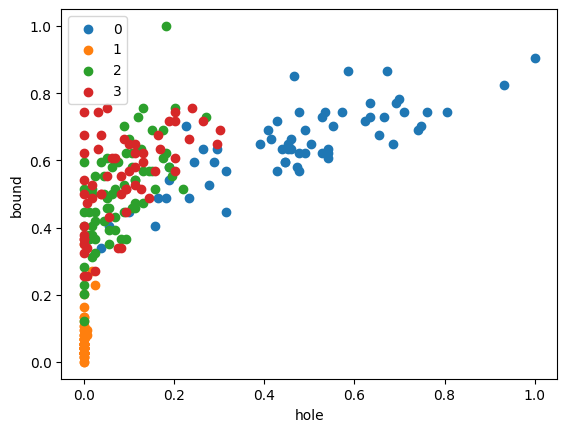

In [ ]:
fig, ax = plotData(train_feats_rescaled, train_y)

This type of rescaling makes all the features between 0 and 1.

Let us calculate the accuracy obtained by this transform:

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier  # Using a Multi-layer Perceptron as an NN example
from sklearn.metrics import accuracy_score

# Example NN function (MLPClassifier used as neural network)
def NN(train_feats_rescaled, train_y, test_feats_rescaled):
    # Define a simple neural network
    model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

    # Train the model on training data
    model.fit(train_feats_rescaled, train_y)

    # Make predictions on the test data
    test_pred = model.predict(test_feats_rescaled)
    return test_pred

# Accuracy function
def Accuracy(true_labels, predictions):
    return accuracy_score(true_labels, predictions)

# Sample data (replace with actual data)
train_feats_rescaled = np.random.randn(100, 10)  # 100 samples, 10 features
train_y = np.random.randint(0, 2, 100)           # Binary labels (0 or 1)
test_feats_rescaled = np.random.randn(20, 10)    # 20 test samples, 10 features
test_y = np.random.randint(0, 2, 20)             # True test labels

# Call NN and Accuracy functions
test_pred = NN(train_feats_rescaled, train_y, test_feats_rescaled)
acc = Accuracy(test_y, test_pred)

# Print the accuracy
print("Accuracy after transform:", acc * 100, "%")


Accuracy after transform: 60.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


All 2D linear transformations can be repreented by a transformation matrix. So what is the matrix associated with the rescaling function? Actually, we cannot represent rescaling with a matrix multiplication, because it is not a linear transform. Rescaling involves shifting the origin of the data, which is not allowed under linear transformations.

We can represent rescaling as a matrix multiplication followed by a vector addition. Let our first feature vector be called X and second feature vector be called Y. Suppose we want to rescale a data point [a,b]

$$ \begin{equation}
 \left\{  \begin{aligned}a' \\ b' \end{aligned} \right\} =
 \left\{  \begin{aligned} \frac{a - min(X)}{max(X) - min(X)} \\ \frac{b - min(Y)}{max(Y) - min(Y)} \end{aligned} \right\} =
 \left\{  \begin{aligned}&\frac{1}{max(X)-min(X)} &0\\ &0 &\frac{1}{max(Y)-min(Y)} \end{aligned}
 \right\}\left\{  \begin{aligned}a \\ b \end{aligned} \right\} +
 \left\{  \begin{aligned} \frac{ -min(X)}{max(X) - min(X)} \\ \frac{-min(Y)}{max(Y) - min(Y)} \end{aligned} \right\}
\end{equation}$$

You can verify this yourself if you wish, though it is not necessary.

